# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
X.shape

(200, 2)

In [7]:
# relation between the features

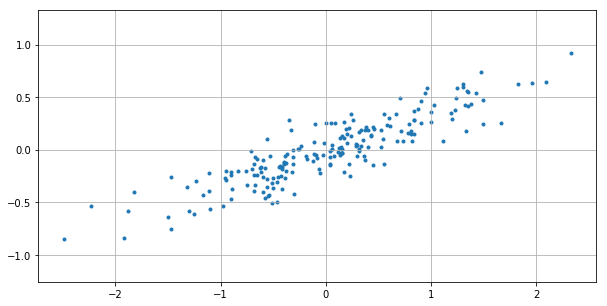

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],s=9)
plt.axis('equal')
plt.grid()

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [12]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [13]:
# components are the eigenvectors

In [14]:
# explained_variance_ are the eigenvalues

In [15]:
# plot

In [16]:
def draw_eigenvector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)

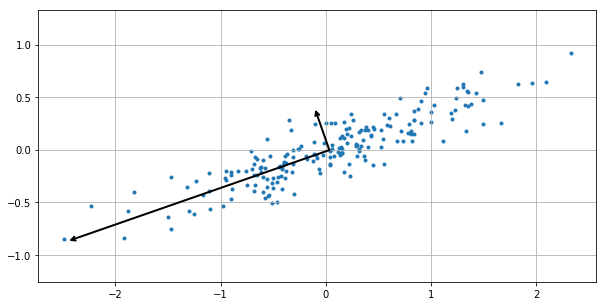

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],s=9)
for length, vector in zip(pca.explained_variance_,pca.components_):
    v = vector*3*np.sqrt(length)
    draw_eigenvector(pca.mean_,pca.mean_+v)
plt.grid()
plt.axis('equal');

# PCA as dimensional reduction tool

In [19]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [20]:
X.shape

(200, 2)

In [21]:
X_pca.shape

(200, 1)

In [22]:
X_new = pca.inverse_transform(X_pca)

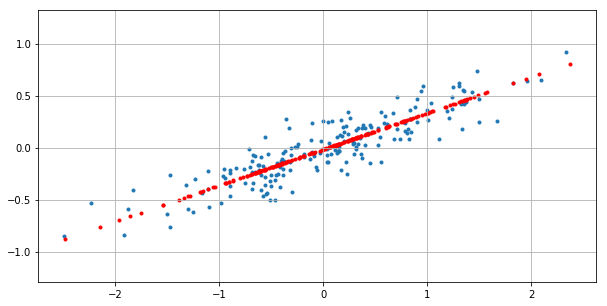

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],s=9)
plt.scatter(X_new[:,0],X_new[:,1],s=9,color='r')
plt.axis('equal')
plt.grid()

## Handwritten digits

In [24]:
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [33]:
digits.target[13]

3

In [28]:
# project from 64 to 2 dimensions

In [29]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
projected.shape

(1797, 2)

Text(0, 0.5, 'Principal component 2')

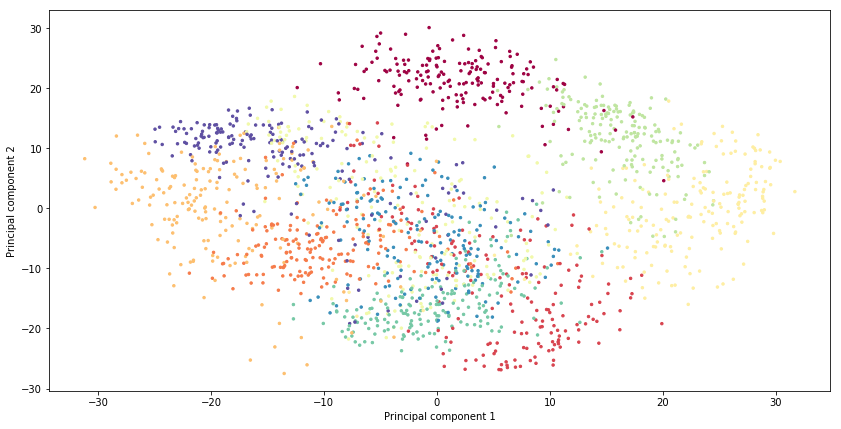

In [34]:
plt.figure(figsize=(14,7))
plt.scatter(projected[:,0],projected[:,1],
           c = digits.target, s = 6,
           cmap = plt.cm.get_cmap('Spectral',10))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

In [35]:
# colorbar to identify the digits

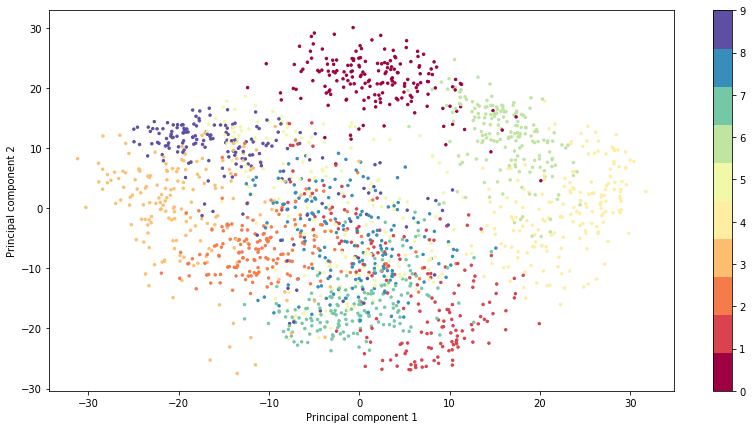

In [36]:
plt.figure(figsize=(14,7))
plt.scatter(projected[:,0],projected[:,1],
           c = digits.target, s = 6,
           cmap = plt.cm.get_cmap('Spectral',10))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar();

In [39]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),
                            subplot_kw ={'xticks':[],'yticks':[]})
    # plot images
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary',interpolation='nearest',clim=(0,16))

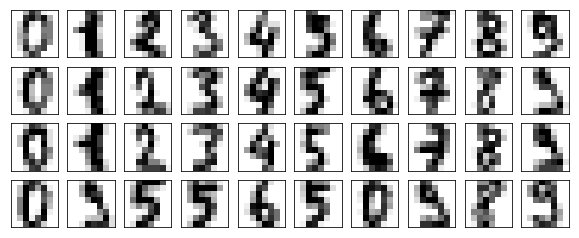

In [40]:
plot_digits(digits.data)

In [41]:
# add noise to the digits

In [42]:
np.random.seed(42)
noisy = np.random.normal(digits.data,4)

In [44]:
noisy.shape

(1797, 64)

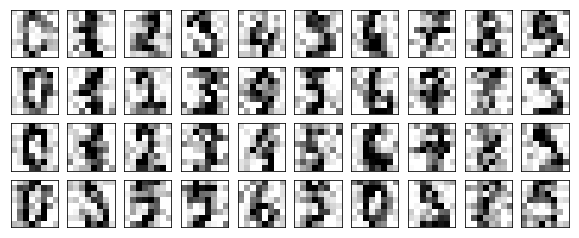

In [45]:
plot_digits(noisy)

In [46]:
# train a PCA requesting that the projection preserve 50% of the total variance

In [47]:
pca = PCA(0.50).fit(noisy)

In [48]:
pca.n_components_

12

In [49]:
# 50% of the total variance amounts to 12 principal components

In [50]:
# compute these 12 components, then use the inverse transformation to reconstruct

In [51]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)

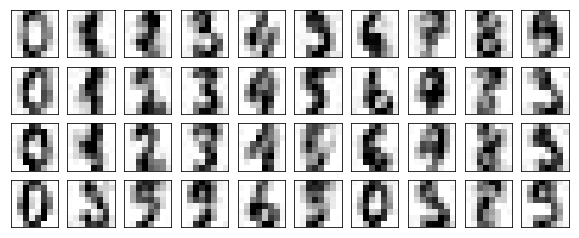

In [53]:
plot_digits(filtered)